# Course: Information visualization
# Student: Kristine Vardanyan

### Importing packages

In [173]:
import pandas as pd
import matplotlib.pyplot as plt

### Importing our data and presenting

In [174]:
data = pd.read_csv("C:/Users/DELL/Downloads/weather-check.csv")

In [175]:
data.head(927)

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic
...,...,...,...,...,...,...,...,...,...
922,3877568116,No,Internet search,-,Very unlikely,60+,Female,"$100,000 to $124,999",West South Central
923,3877568054,Yes,The Weather Channel,-,Very likely,45 - 59,Female,Prefer not to answer,Pacific
924,3877568053,Yes,The default weather app on your phone,-,Very likely,30 - 44,Female,Prefer not to answer,South Atlantic
925,3877566926,Yes,Local TV News,-,Somewhat likely,60+,Female,Prefer not to answer,Pacific


### Counting the unique responses in the Age, US Ragions and Responses columns

In [176]:
unique_responses = data['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'].unique()

print("Unique responses in the column:")
for response in unique_responses:
    print(response)


Unique responses in the column:
Very likely
Somewhat likely
Very unlikely
-
Somewhat unlikely


In [177]:
very_likely_count = data[data['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'] == 'Very likely'].shape[0]
somewhat_likely_count = data[data['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'] == 'Somewhat likely'].shape[0]
very_unlikely_count = data[data['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'] == 'Very unlikely'].shape[0]
somewhat_unlikely_count = data[data['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'] == 'Somewhat unlikely'].shape[0]
missing_value = data[data['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'] == '-'].shape[0]
print("Very likely:", very_likely_count)
print("Somewhat likely:", somewhat_likely_count)
print("Very unlikely:", very_unlikely_count)
print("Somewhat unlikely:", somewhat_unlikely_count)
print("No response:", missing_value)

Very likely: 362
Somewhat likely: 274
Very unlikely: 208
Somewhat unlikely: 73
No response: 11


In [178]:
unique_responses_age = data['Age'].unique()

print("Unique responses in the column:")
for response1 in unique_responses_age:
    print(response1)

Unique responses in the column:
30 - 44
18 - 29
-
45 - 59
60+


In [179]:
unique_responses_regions = data['US Region'].unique()

print("Unique responses in the column:")
for response2 in unique_responses_regions:
    print(response2)

Unique responses in the column:
South Atlantic
-
Middle Atlantic
West South Central
Pacific
West North Central
East North Central
Mountain
New England
East South Central


### Plotting the bar chart where the Variable 1 is RESPONSES and Variable 2 is AGE

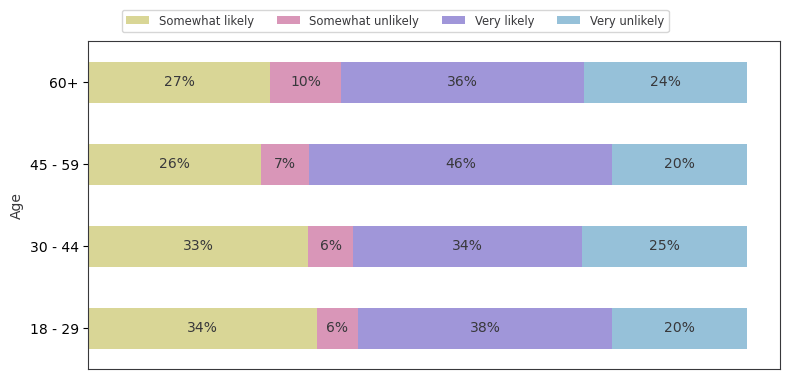

In [180]:
data_filtered = data[(data['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'] != '-') & (data['Age'] != '-')]

pivot_table = data_filtered.pivot_table(index='Age', 
                                        columns='If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?', 
                                        aggfunc='size', 
                                        fill_value=0)

percentages = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

colors = ['#d9d696', '#d996b8', '#a096d9', '#96c1d9']

fig, ax = plt.subplots(figsize=(8, 4))

bars = percentages.plot(kind='barh', stacked=True, ax=ax, color=colors)
plt.ylabel('Age', color='#38383b')

legend = plt.legend(bbox_to_anchor=(0.5, 0.95), loc='upper center', ncol=4, fontsize='small', bbox_transform=plt.gcf().transFigure)
plt.setp(legend.get_texts(), color='#38383b')

ax.set_xticklabels([], color='#38383b')
ax.tick_params(axis='x', which='both', length=0)

for bar in bars.containers:
    for rect in bar:
        width = rect.get_width()
        label_x = rect.get_x() + rect.get_width() / 2
        label_y = rect.get_y() + rect.get_height() / 2
        ax.annotate(f'{int(width)}%', 
                    xy=(label_x, label_y),
                    xytext=(0, 0),
                    textcoords="offset points",
                    ha='center', va='center',
                    color='#38383b')

ax.spines['bottom'].set_color('#38383b')
ax.spines['left'].set_color('#38383b') 
ax.spines['top'].set_color('#38383b') 
ax.spines['right'].set_color('#38383b')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Plotting the bar chart where the Variable 1 is RESPONSES and Variable 2 is US RAGIONS

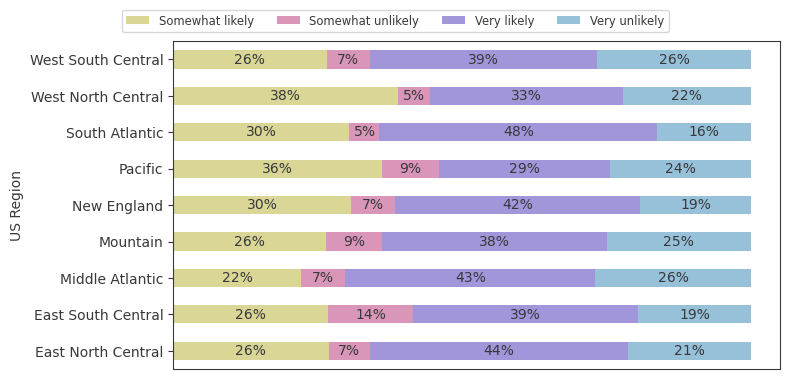

In [181]:
data_filtered = data[(data['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'] != '-') & (data['US Region'] != '-')]

pivot_table = data_filtered.pivot_table(index='US Region', 
                                     columns='If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?', 
                                     aggfunc='size', 
                                     fill_value=0)

percentages = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

custom_colors = ['#d9d696', '#d996b8', '#a096d9', '#96c1d9']

fig, ax = plt.subplots(figsize=(8, 4))

bars = percentages.plot(kind='barh', stacked=True, ax=ax, color=custom_colors)
plt.ylabel('US Region', color='#38383b')

legend = plt.legend(bbox_to_anchor=(0.5, 0.95), loc='upper center', ncol=4, fontsize='small', bbox_transform=plt.gcf().transFigure)
for text in legend.get_texts():
    text.set_color('#38383b')

ax.set_xticklabels([], color='#38383b')
ax.tick_params(axis='x', which='both', length=0, color='#38383b')
ax.tick_params(axis='y', colors='#38383b')
ax.spines['bottom'].set_color('#38383b')
ax.spines['top'].set_color('#38383b')
ax.spines['left'].set_color('#38383b')
ax.spines['right'].set_color('#38383b')

for bar in bars.containers:
    for rect in bar:
        width = rect.get_width()
        label_x = rect.get_x() + rect.get_width() / 2
        label_y = rect.get_y() + rect.get_height() / 2
        ax.annotate(f'{int(width)}%', 
                    xy=(label_x, label_y),
                    xytext=(0, 0),
                    textcoords="offset points",
                    ha='center', va='center',
                    color='#38383b')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Plotting bar chart with absolute values, that do not sum up to 100% | Variable 1 = Responses, Variable 2 = Age

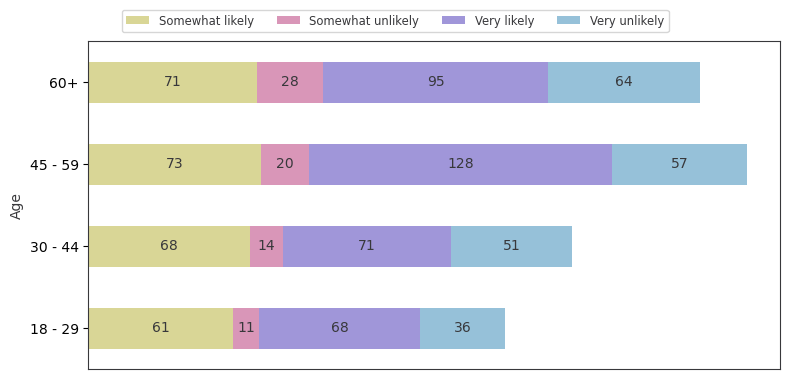

In [182]:
data_filtered = data[(data['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'] != '-') & (data['Age'] != '-')]

pivot_table = data_filtered.pivot_table(index='Age', 
                                        columns='If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?', 
                                        aggfunc='size', 
                                        fill_value=0)

colors = ['#d9d696', '#d996b8', '#a096d9', '#96c1d9']

fig, ax = plt.subplots(figsize=(8, 4))

bars = pivot_table.plot(kind='barh', stacked=True, ax=ax, color=colors)
plt.ylabel('Age', color='#38383b')

legend = plt.legend(bbox_to_anchor=(0.5, 0.95), loc='upper center', ncol=4, fontsize='small', bbox_transform=plt.gcf().transFigure)
plt.setp(legend.get_texts(), color='#38383b')

ax.set_xticklabels([], color='#38383b')
ax.tick_params(axis='x', which='both', length=0)

for bar in bars.containers:
    for rect in bar:
        width = rect.get_width()
        label_x = rect.get_x() + rect.get_width() / 2
        label_y = rect.get_y() + rect.get_height() / 2
        ax.annotate(f'{int(width)}', 
                    xy=(label_x, label_y),
                    xytext=(0, 0),
                    textcoords="offset points",
                    ha='center', va='center',
                    color='#38383b')

ax.spines['bottom'].set_color('#38383b')
ax.spines['left'].set_color('#38383b')
ax.spines['top'].set_color('#38383b')
ax.spines['right'].set_color('#38383b')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


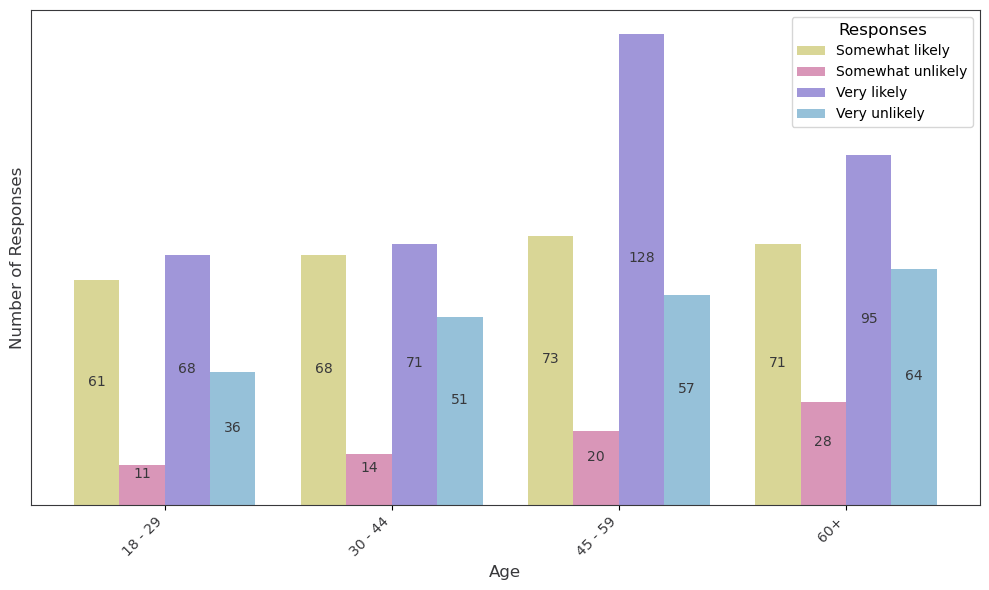

In [190]:
data_filtered = data[(data['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'] != '-') & (data['Age'] != '-')]

pivot_table = data_filtered.pivot_table(index='Age', 
                                        columns='If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?', 
                                        aggfunc='size', 
                                        fill_value=0)

colors = ['#d9d696', '#d996b8', '#a096d9', '#96c1d9']

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = list(range(len(pivot_table)))

for i, col in enumerate(pivot_table.columns):
    ax.bar([x + i * bar_width for x in index], pivot_table[col], width=bar_width, color=colors[i], label=col)

ax.set_xticks([x + 1.5 * bar_width for x in index])
ax.set_xticklabels(pivot_table.index, rotation=45, ha='right', color='#38383b')

plt.xlabel('Age', fontsize=12, color='#38383b')
plt.ylabel('Number of Responses', fontsize=12, color='#38383b')
plt.legend(title='Responses', fontsize=10, title_fontsize='12', loc='upper right')

ax.tick_params(axis='y', which='both', left=False, labelleft=False)
plt.xticks(color='#38383b')

for spine in ax.spines.values():
    spine.set_color('#38383b')

ax.grid(False)

for i, col in enumerate(pivot_table.columns):
    for j, val in enumerate(pivot_table[col]):
        plt.annotate(f'{val}', 
                     xy=(index[j] + i * bar_width + bar_width / 2 - 0.1, val / 2),
                     xytext=(0, 3), 
                     textcoords="offset points", 
                     ha='center', 
                     va='bottom',
                     color='#38383b')

plt.tight_layout()
plt.show()


### Plotting bar chart with absolute values, that do not sum up to 100% | Variable 1 = Responses, Variable 2 = US Regions

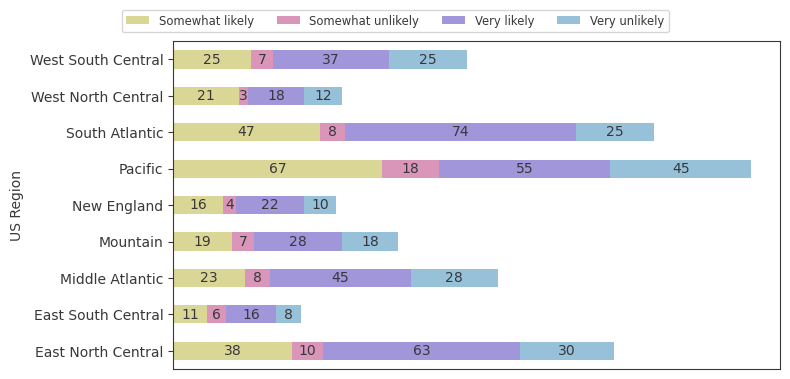

In [191]:
data_filtered = data[(data['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'] != '-') & (data['US Region'] != '-')]

pivot_table = data_filtered.pivot_table(index='US Region', 
                                     columns='If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?', 
                                     aggfunc='size', 
                                     fill_value=0)

colors = ['#d9d696', '#d996b8', '#a096d9', '#96c1d9']

fig, ax = plt.subplots(figsize=(8, 4))

bars = pivot_table.plot(kind='barh', stacked=True, ax=ax, color=colors)
plt.ylabel('US Region', color='#38383b')

legend = plt.legend(bbox_to_anchor=(0.5, 0.95), loc='upper center', ncol=4, fontsize='small', bbox_transform=plt.gcf().transFigure)
for text in legend.get_texts():
    text.set_color('#38383b')

ax.set_xticklabels([], color='#38383b')
ax.tick_params(axis='x', which='both', length=0, color='#38383b')
ax.tick_params(axis='y', colors='#38383b')

for spine in ax.spines.values():
    spine.set_color('#38383b')

for bar in bars.containers:
    for rect in bar:
        width = rect.get_width()
        label_x = rect.get_x() + rect.get_width() / 2
        label_y = rect.get_y() + rect.get_height() / 2
        ax.annotate(f'{int(width)}', 
                    xy=(label_x, label_y),
                    xytext=(0, 0),
                    textcoords="offset points",
                    ha='center', va='center',
                    color='#38383b')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


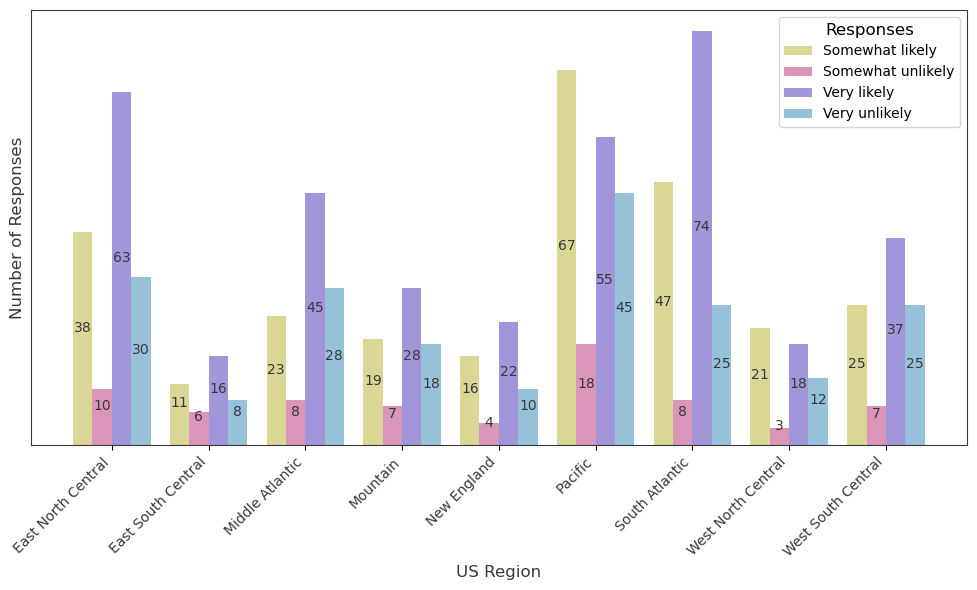

In [192]:
data_filtered = data[(data['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'] != '-') & (data['US Region'] != '-')]

pivot_table = data_filtered.pivot_table(index='US Region', 
                                        columns='If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?', 
                                        aggfunc='size', 
                                        fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#d9d696', '#d996b8', '#a096d9', '#96c1d9']

bar_width = 0.2

index = list(range(len(pivot_table)))

for i, col in enumerate(pivot_table.columns):
    ax.bar([x + i * bar_width for x in index], pivot_table[col], width=bar_width, color=colors[i], label=col)

ax.set_xticks([x + 1.5 * bar_width for x in index])
ax.set_xticklabels(pivot_table.index, rotation=45, ha='right')

plt.xlabel('US Region', fontsize=12, color='#38383b')
plt.ylabel('Number of Responses', fontsize=12, color='#38383b')
plt.legend(title='Responses', fontsize=10, title_fontsize='12', loc='upper right')

ax.tick_params(axis='y', which='both', left=False, labelleft=False)
plt.xticks(color='#38383b')

ax.spines['bottom'].set_color('#38383b')
ax.spines['left'].set_color('#38383b')
ax.spines['right'].set_color('#38383b')
ax.spines['top'].set_color('#38383b')

ax.grid(False)

for i, col in enumerate(pivot_table.columns):
    for j, val in enumerate(pivot_table[col]):
        plt.annotate(f'{val}', 
                     xy=(index[j] + i * bar_width + bar_width / 2 - 0.1, val / 2),
                     xytext=(0, 3), 
                     textcoords="offset points", 
                     ha='center', 
                     va='bottom',
                     color='#38383b')

plt.tight_layout()
plt.show()
